In [1]:
import csv
COUNTY_RESULTS = {}
with open("PA/PA_COUNTY_RESULTS.csv",'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        COUNTY_RESULTS[row["County"].capitalize()] = row

In [2]:
COUNTY_RESULTS

{'Adams': {'CASTLE, DARRELL L': '191',
  'CLINTON, HILLARY': '14077',
  'County': 'ADAMS',
  'JOHNSON, GARY E': '1222',
  'STEIN, JILL': '399',
  'TRUMP, DONALD J': '31249'},
 'Allegheny': {'CASTLE, DARRELL L': '1793',
  'CLINTON, HILLARY': '363017',
  'County': 'ALLEGHENY',
  'JOHNSON, GARY E': '15854',
  'STEIN, JILL': '5021',
  'TRUMP, DONALD J': '257488'},
 'Armstrong': {'CASTLE, DARRELL L': '124',
  'CLINTON, HILLARY': '6849',
  'County': 'ARMSTRONG',
  'JOHNSON, GARY E': '661',
  'STEIN, JILL': '136',
  'TRUMP, DONALD J': '22676'},
 'Beaver': {'CASTLE, DARRELL L': '339',
  'CLINTON, HILLARY': '30225',
  'County': 'BEAVER',
  'JOHNSON, GARY E': '1914',
  'STEIN, JILL': '477',
  'TRUMP, DONALD J': '46081'},
 'Bedford': {'CASTLE, DARRELL L': '77',
  'CLINTON, HILLARY': '3613',
  'County': 'BEDFORD',
  'JOHNSON, GARY E': '259',
  'STEIN, JILL': '100',
  'TRUMP, DONALD J': '19455'},
 'Berks': {'CASTLE, DARRELL L': '749',
  'CLINTON, HILLARY': '75169',
  'County': 'BERKS',
  'JOHNSON, 

In [3]:
import shapefile
sf = shapefile.Reader("PA/tl_2011_us_county/tl_2011_us_county")
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['STATEFP', 'C', 2, 0],
 ['COUNTYFP', 'C', 3, 0],
 ['COUNTYNS', 'C', 8, 0],
 ['GEOID', 'C', 5, 0],
 ['NAME', 'C', 100, 0],
 ['NAMELSAD', 'C', 100, 0],
 ['LSAD', 'C', 2, 0],
 ['CLASSFP', 'C', 2, 0],
 ['MTFCC', 'C', 5, 0],
 ['CSAFP', 'C', 3, 0],
 ['CBSAFP', 'C', 5, 0],
 ['METDIVFP', 'C', 5, 0],
 ['FUNCSTAT', 'C', 1, 0],
 ['ALAND', 'N', 14, 0],
 ['AWATER', 'N', 14, 0],
 ['INTPTLAT', 'C', 11, 0],
 ['INTPTLON', 'C', 12, 0]]

In [5]:
import shapely.geometry as geom
COUNTY_SHAPES = {}
iter = sf.iterShapeRecords()
for i in iter:
    if i.record[0] == '42':
        s = geom.shape(i.shape)
        COUNTY_SHAPES[i.record[4].capitalize()]=s
        print(i.record[4].capitalize(),s.area)

In [11]:
COUNTY_RESULTS['Allegheny']

{'CASTLE, DARRELL L': '1793',
 'CLINTON, HILLARY': '363017',
 'County': 'ALLEGHENY',
 'JOHNSON, GARY E': '15854',
 'STEIN, JILL': '5021',
 'TRUMP, DONALD J': '257488'}

In [6]:
import csv
VOTERS = {}
with open("PA/pa_registerd_voters_county.csv",'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        VOTERS[row["County"].capitalize()] = row


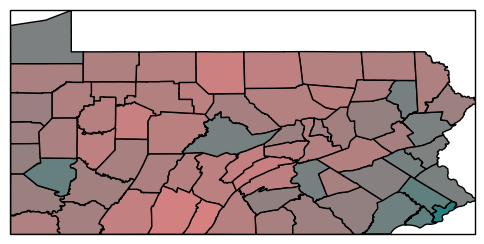

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())


counties = []
colors = []
names = []
for k,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[k])
    del meta["County"]
    total = sum([int(f) for f in meta.values()])
    color = (int(meta["TRUMP, DONALD J"])/total,0.5,0.5)
    #print(k, total, meta["TRUMP, DONALD J"], color)
    counties.append(v)
    colors.append(color)
    names.append(k)
    cf = cfeature.ShapelyFeature([v], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

#for k,v in zip(names, colors):
#    print(k,v)
    
ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

plt.show()

Greene 1.0274812178726769


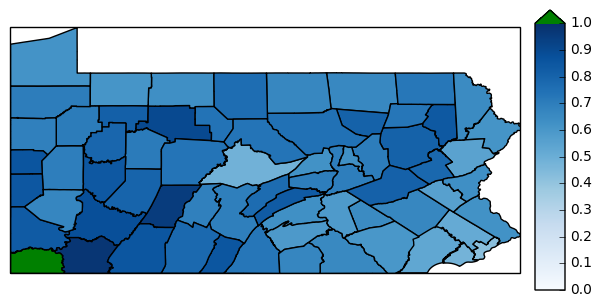

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl

fig = plt.figure()#figsize=(8, 3))
ax = fig.add_axes([0.05, 0.05, 0.85, 0.9], projection=ccrs.PlateCarree())
ax2 = fig.add_axes([0.925, 0.15, 0.05, 0.7])

# ax = plt.axes(projection=ccrs.PlateCarree())
colormap = cm.get_cmap("Blues")
colormap.set_bad('orange')
colormap.set_over('g')
colormap.set_under('k')

# values = []
# for county,v in COUNTY_RESULTS.items():
#     meta = dict(COUNTY_RESULTS[k])
#     del meta["County"]
#     total = sum([int(f) for f in meta.values()])
#     vap = int(dict(VOTERS[k])["ALL"])
#     value = int(meta["TRUMP, DONALD J"])/sum([int(VOTERS[k]["REP"]), int(VOTERS[k]["OTH"]), int(VOTERS[k]["NOF"])])

for k,v in COUNTY_SHAPES.items():
    meta = dict(COUNTY_RESULTS[k])
#     del meta["County"]
#     total = sum([int(f) for f in meta.values()])
    vap = int(dict(VOTERS[k])["ALL"])
#     color = total/vap
    value = int(meta["CLINTON, HILLARY"])/int(VOTERS[k]["DEM"])
    value = int(meta["TRUMP, DONALD J"])/sum([int(VOTERS[k]["REP"]), int(VOTERS[k]["OTH"]), int(VOTERS[k]["NOF"])])
    color = colormap(value)
    if value > 1:
        print(k, value)
    cf = cfeature.ShapelyFeature([v], ccrs.PlateCarree())
    ax.add_feature(cf, facecolor=color)

ax.set_extent([-80.5198510000000027,-74.7215190000000007,39.7211469999999949,42.5160720000000012])
ax.set_aspect(1)

cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=colormap, norm=colors.Normalize(vmin=0, vmax=1), extend='max')

plt.show()

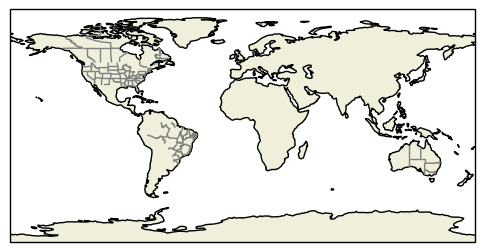

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText


ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([80, 170, -45, 30])

# Put a background image on for nice sea rendering.
#ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

# Add a text annotation for the license information to the
# the bottom right corner.
text = AnchoredText(r'$\mathcircled{{c}}$ {}; license: {}'
                    ''.format(SOURCE, LICENSE),
                    loc=4, prop={'size': 12}, frameon=True)
# ax.add_artist(text)

plt.show()